<a href="https://colab.research.google.com/github/Sabri3299/M-L-Project/blob/M-L/ANN_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast cancer Classification with a simple Neural Network (NN)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection & Processing

In [ ]:
#loading the data from sklearn
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

In [ ]:
heart_set=pd.read_csv("heart.csv")

In [ ]:
heart_set  # data is i a form of a dictionary


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#print the first 5 rows of the dataframe
heart_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# adding the 'target' column to the data frame
heart_set['target'] = heart_set.target

In [ ]:
#print last 5 rows of the dataframe
heart_set.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,label
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,0


In [ ]:
#number of rows and columns in the dataset
heart_set.shape

(303, 15)

In [ ]:
#getting some inforamtion about the data
heart_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
 14  label     303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [ ]:
#checking for missing values
heart_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
label       0
dtype: int64

In [ ]:
#statistical measures about the data
heart_set.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [ ]:
#checking the distribution of target variable
heart_set['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 -> Benign ( doesn't travel to other parts of the body)



0 -> Malignant( travels to other parts of the body so cancerous)

In [ ]:
heart_set.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
target,,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0


Sperating the features and target

In [ ]:
X = heart_set.drop (columns='target', axis=1)
Y = heart_set['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  label  
0        0   0     1      1  
1        0   0     2      1

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the data into Training data & Testing data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


In [ ]:
# Check feature names of input data before transformation
print("Input Feature Names:", X.columns)

Input Feature Names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label'],
      dtype='object')


In [ ]:
X_test.to_csv("breast_test.csv",index=False)
from google.colab import files
#files.download("breast_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

x_test_std = scaler.transform(X_test)




Building the Neural Network

In [ ]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# Define the model
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(14,)),       # Input layer with shape (30,)
    tf.keras.layers.Dense(20, activation='relu'),   # Hidden layer with 20 units and ReLU activation
    tf.keras.layers.Dense(2, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])


In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#trainig the Neural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 35ms/step - loss: 0.8709 - accuracy: 0.4009 - val_loss: 0.7304 - val_accuracy: 0.4800
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.8085 - accuracy: 0.4562 - val_loss: 0.6767 - val_accuracy: 0.6000
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.7561 - accuracy: 0.4793 - val_loss: 0.6293 - val_accuracy: 0.6000
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: 0.7105 - accuracy: 0.5115 - val_loss: 0.5877 - val_accuracy: 0.6400
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.5346 - val_loss: 0.5501 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.6283 - accuracy: 0.5945 - val_loss: 0.5157 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5936 - accuracy: 0.6682 - val_loss: 0.4838 - val_accuracy: 0.8000
Epoch 8/10
7/7 [================

Visualizing accuracy and loss

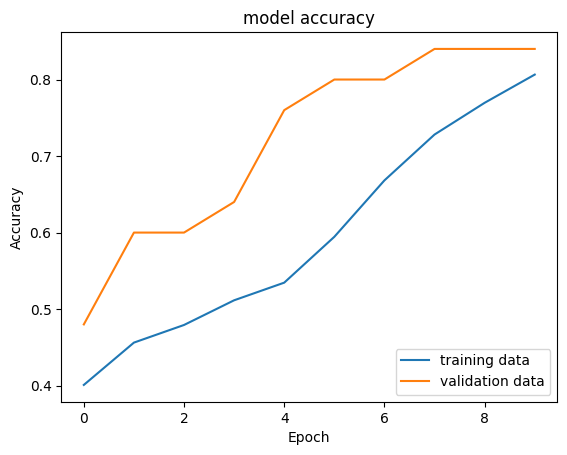

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

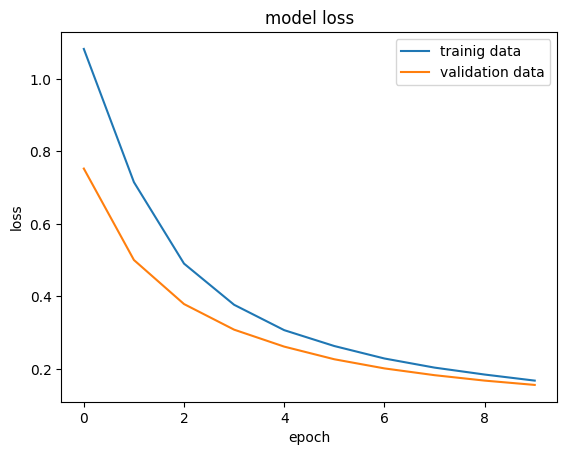

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['trainig data', 'validation data'],loc = 'upper right')

Accuracy of model on test data

In [ ]:
loss, accuracy = model.evaluate(x_test_std, Y_test)
print(accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.4618 - accuracy: 0.8525
0.8524590134620667


In [ ]:
Y_pred = model.predict(x_test_std)

2/2 [==============================] - 0s 7ms/step


In [ ]:
Y_pred

array([[0.67778623, 0.93194026],
       [0.6324297 , 0.4660654 ],
       [0.34908438, 0.38635778],
       [0.19477598, 0.71101886],
       [0.6098991 , 0.42874822],
       [0.53813875, 0.5885062 ],
       [0.29898864, 0.52084136],
       [0.43957502, 0.7028687 ],
       [0.48115775, 0.36883402],
       [0.6603638 , 0.88398933],
       [0.39086786, 0.32448643],
       [0.12688106, 0.6030001 ],
       [0.64320433, 0.5276083 ],
       [0.3781182 , 0.30011496],
       [0.1448052 , 0.48317555],
       [0.2025731 , 0.5766422 ],
       [0.573151  , 0.47879475],
       [0.31664476, 0.7301656 ],
       [0.280366  , 0.22342584],
       [0.7259841 , 0.68926024],
       [0.2408556 , 0.3917603 ],
       [0.51395124, 0.7001429 ],
       [0.58472574, 0.4565314 ],
       [0.31581473, 0.4445355 ],
       [0.51183367, 0.67218786],
       [0.58092105, 0.8162823 ],
       [0.1558252 , 0.69957215],
       [0.64246714, 0.6405501 ],
       [0.56669384, 0.6278583 ],
       [0.33842137, 0.57912135],
       [0.

model.predict() gives the prediction probalility of each class for that data point

In [ ]:
                                                                                                                                                               #   converting the prediction probability to class labels

Y_pred_target = [np.argmax(i) for i in Y_pred]
print(Y_pred_target)

[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0]


Buliding the predictive system

In [ ]:
input_data = (50,0,2,120,219,0,1,158,0,1.6,1,0,2,1)

# change the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

##standardizing the input dat
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label[0])

if(prediction_label[0] == 0):
 print('Has Disease')

else:
  print('Healthy')

1/1 [==============================] - 0s 34ms/step
[[0.14177871 0.5523954 ]]
1
Healthy


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
